In [8]:
import numpy as np
import pandas as pd

In [9]:
df_product = pd.read_csv('../data-collection-preprocessing/data-produk/clean_product-goodgamingshop.csv')
df_review = pd.read_csv('../data-collection-preprocessing/data-ulasan-clean/clean_data-ulasan-goodgamingstore.csv')

In [10]:
df_product.head()

,id_produk,nama_produk,jumlah_terjual,harga_jual,harga_awal,diskon,deskripsi,rating,rating_counter,link,image_path,kategori
0,PI0001,"AKKO CS SWITCH MECHANICAL KEYBOARD - ROSE RED,...",7000,3599,4600,0.22,JAM OPERASIONAL\r\nSenin - Minggu : 10:00 - 19...,5.0,166,https://www.tokopedia.com/goodgamingshop/akko-...,../data-collection-preprocessing/data-produk/i...,Komputer & Laptop; Aksesoris PC Gaming; Game C...
1,PI0002,"Zaku Switch Linear 63,5g PCB Mount - Keyboard ...",7000,7999,10499,0.24,JAM OPERASIONAL\r\nSenin - Minggu : 10:00 - 19...,4.9,92,https://www.tokopedia.com/goodgamingshop/zaku-...,../data-collection-preprocessing/data-produk/i...,Komputer & Laptop; Aksesoris PC Gaming; Game C...
2,PI0003,GATERON SWITCH - PLATE MOUNT - Cokelat,4000,3500,3500,0.00,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,5.0,111,https://www.tokopedia.com/goodgamingshop/gater...,../data-collection-preprocessing/data-produk/i...,Komputer & Laptop; Aksesoris Komputer & Laptop...
3,PI0004,GATERON Optical MX Switch for Mechanical Gamin...,3000,3500,3500,0.00,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,5.0,89,https://www.tokopedia.com/goodgamingshop/gater...,../data-collection-preprocessing/data-produk/i...,Komputer & Laptop; Aksesoris Komputer & Laptop...
4,PI0005,Ekstra Packaging Bubble Wrap,3000,3100,3100,0.00,Deskripsi Ekstra Packaging Bubble Wrap\r\nHai ...,4.9,0,https://www.tokopedia.com/goodgamingshop/ekstr...,../data-collection-preprocessing/data-produk/i...,Perlengkapan Pesta; Bungkus Kemasan; Bubble Wrap


In [11]:
df_review.head()

,id_produk,id_user,nama_akun,rating_user,ulasan_produk,waktu_review,varian_produk
0,PI2563,UI0001,Bimo,5,Nyaman dan praktis tinggal plug and play,Lebih dari 1 tahun lalu,none
1,PI2564,UI0002,S***m,5,"Keren memang mojo68 retro, sayang typing sound...",9 bulan lalu,Varian: Gat Silver Pro
2,PI2567,UI0003,Riski,5,"buat yg nyari suara pas ngetik, bisa beli yg s...",Lebih dari 1 tahun lalu,Varian: Brown Switch
3,PI2569,UI0004,S***o,5,"rapih, material bagus, nyaman digunakan, dimen...",Lebih dari 1 tahun lalu,none
4,PI2573,UI0005,Winardi,5,Kedua kali beli Zoom75 disini and never dissap...,3 bulan lalu,none


EDA

In [12]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set_theme(style='darkgrid')
sns.set_palette("deep")
mpl.rcParams['font.family'] = 'sans'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

In [13]:
df_product.describe(include='object')

,id_produk,nama_produk,deskripsi,link,image_path,kategori
count,2613,2613,2613,2613,2613,2613
unique,2613,2613,2562,2613,2613,99
top,PI0001,"AKKO CS SWITCH MECHANICAL KEYBOARD - ROSE RED,...",#ERROR!,https://www.tokopedia.com/goodgamingshop/akko-...,../data-collection-preprocessing/data-produk/i...,Komputer & Laptop; Aksesoris PC Gaming; Keyboa...
freq,1,1,7,1,1,462


In [14]:
new_cat

NameError: name 'new_cat' is not defined

In [ ]:
df_product_copy = df_product.copy()
new_cat = df_product['kategori'].str.split(';', expand=True)
new_cat['category_1'] = new_cat[0]
new_cat['category_2'] = new_cat[1]
new_cat['category_3'] = new_cat[2]

df_product_copy.drop('kategori', axis=1, inplace=True)
df_product_copy['kategori_1'] = new_cat['category_1']
df_product_copy['kategori_2'] = new_cat['category_2']
df_product_copy['kategori_3'] = new_cat['category_3']

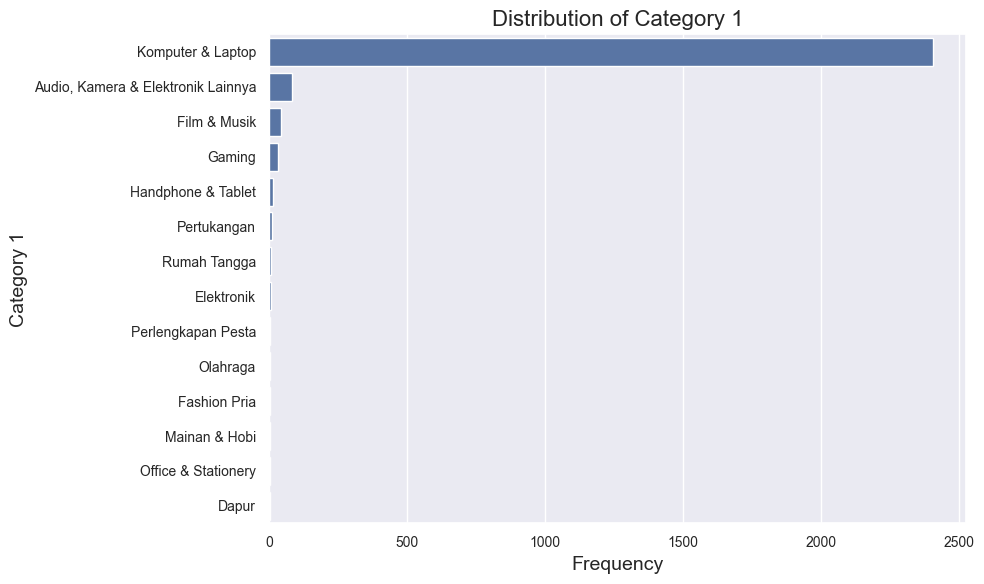

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_product_copy, y='kategori_1', order=df_product_copy['kategori_1'].value_counts().index)
plt.title('Distribution of Category 1')
plt.xlabel('Frequency')
plt.ylabel('Category 1')
plt.tight_layout()
plt.show()

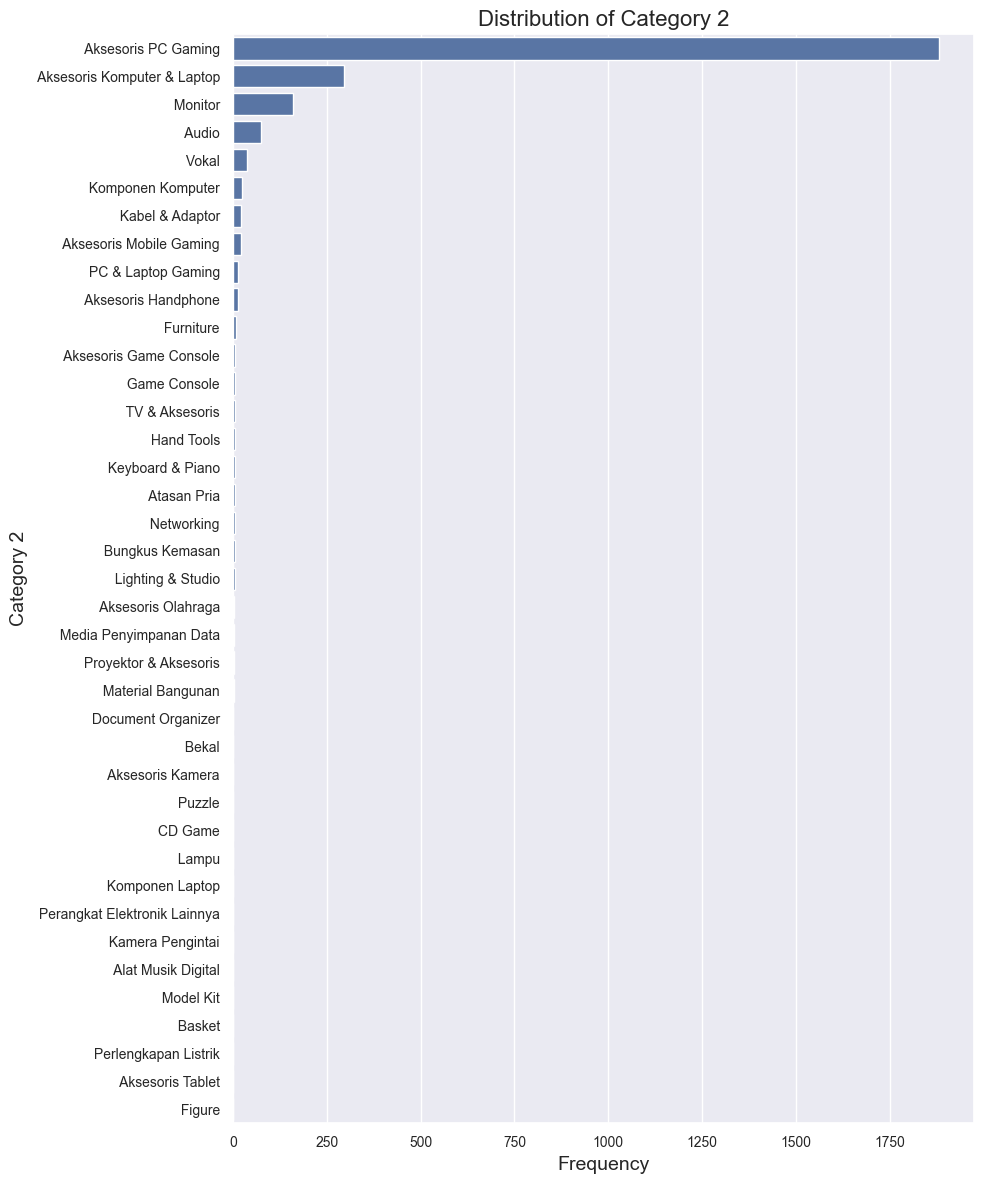

In [ ]:
plt.figure(figsize=(10, 12))
sns.countplot(data=df_product_copy, y='kategori_2', order=df_product_copy['kategori_2'].value_counts().index)
plt.title('Distribution of Category 2')
plt.xlabel('Frequency')
plt.ylabel('Category 2')
plt.tight_layout()
plt.show()

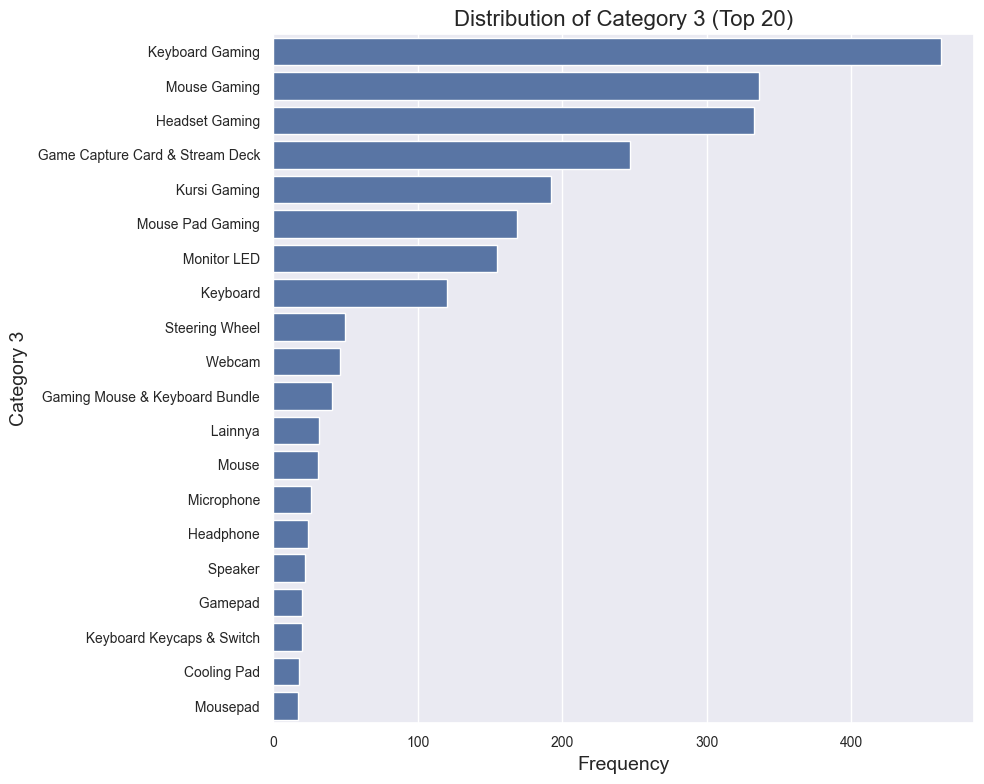

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_product_copy, y='kategori_3', order=df_product_copy['kategori_3'].value_counts().head(20).index)
plt.title('Distribution of Category 3 (Top 20)')
plt.xlabel('Frequency')
plt.ylabel('Category 3')
plt.tight_layout()
plt.show()


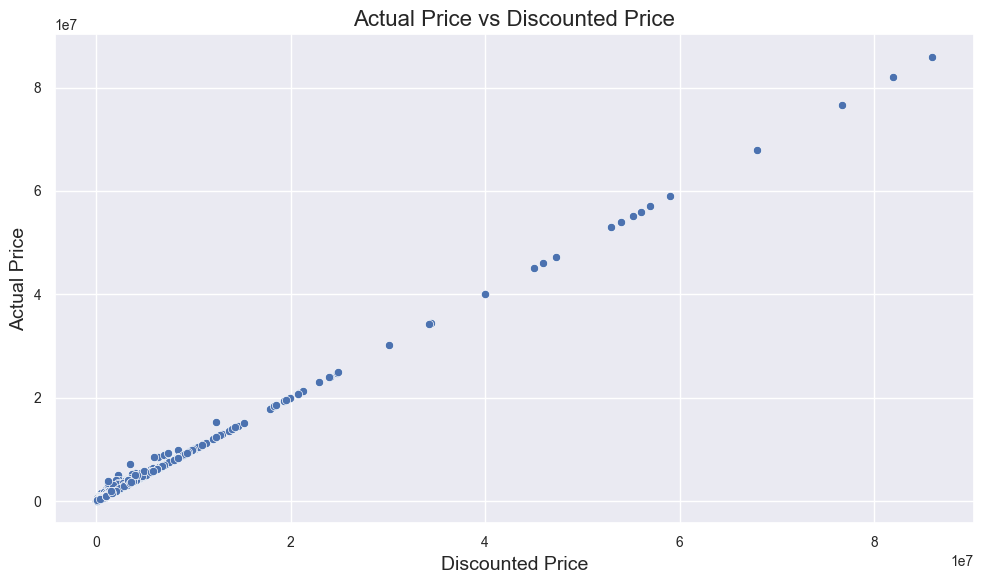

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_product, x='harga_jual', y='harga_awal')
plt.title('Actual Price vs Discounted Price')
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.tight_layout()
plt.show()

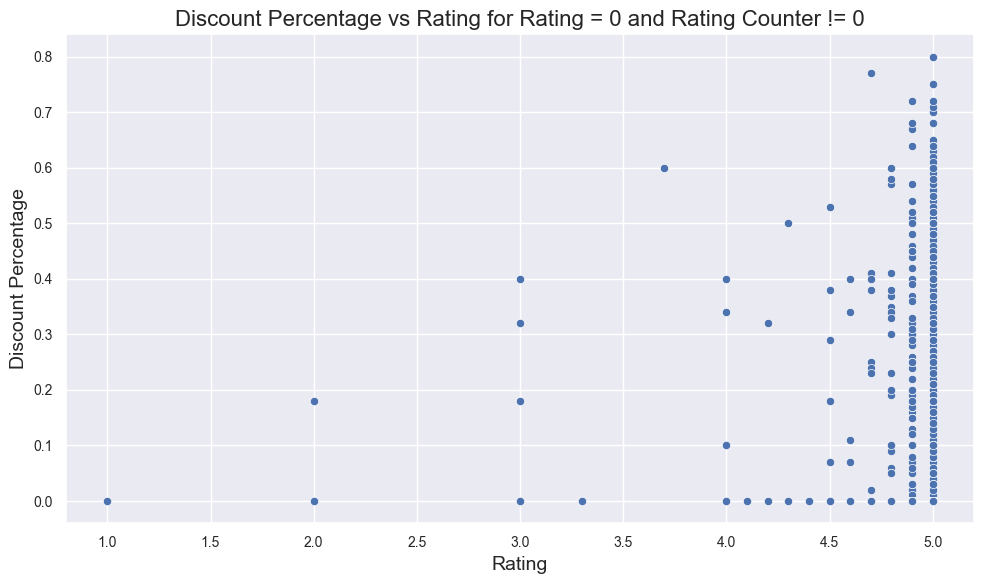

In [ ]:
# Filter the data
filtered_df = df_product[(df_product['rating'] >= 0) & (df_product['rating_counter'] != 0)]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='rating', y='diskon')
plt.title('Discount Percentage vs Rating for Rating = 0 and Rating Counter != 0')
plt.xlabel('Rating')
plt.ylabel('Discount Percentage')
plt.tight_layout()
plt.show()

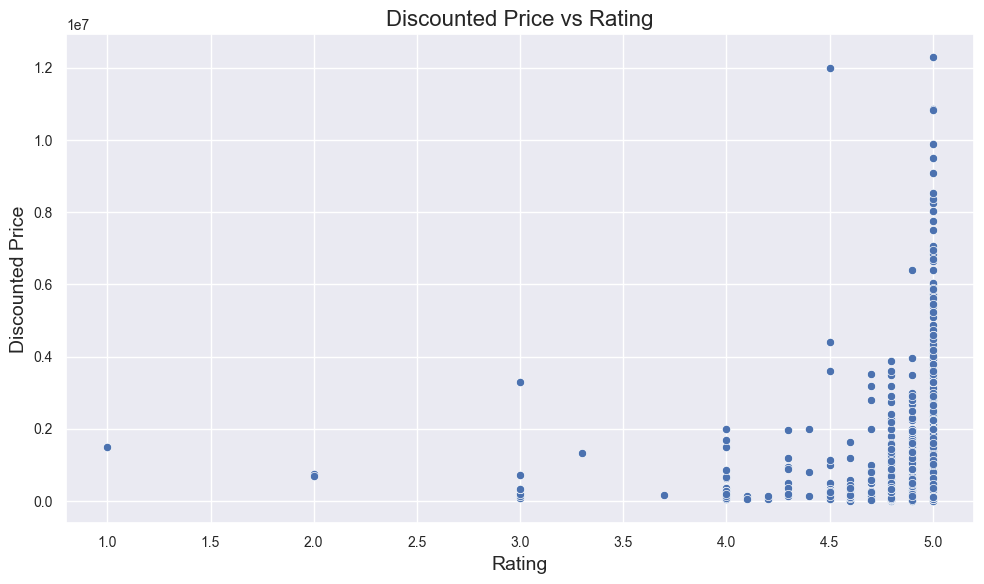

In [ ]:
# Filter the data
filtered_df = df_product[(df_product['rating'] >= 0) & (df_product['rating_counter'] != 0)]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='rating', y='harga_jual')
plt.title('Discounted Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Discounted Price')
plt.tight_layout()
plt.show()

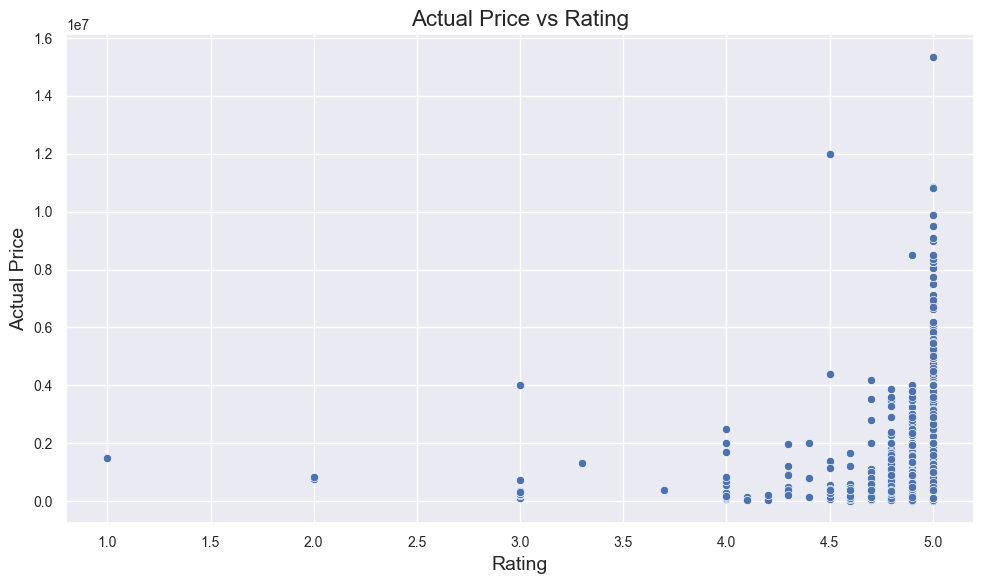

In [ ]:
# Filter the data
filtered_df = df_product[(df_product['rating'] >= 0) & (df_product['rating_counter'] != 0)]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='rating', y='harga_awal')
plt.title('Actual Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Actual Price')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(df_product, x='harga_awal', y='harga_jual', z='rating', color='rating',
                     hover_data=['nama_produk'], title='Interactive 3D Scatter Plot of Rating, Actual Price, and Discounted Price')
fig.show()

# Collaborative Filtering

In [ ]:
df_cf = df_review[['id_produk', 'rating_user', 'id_user']]

df_cf.head()

,id_produk,rating_user,id_user
0,PI2563,5,UI0001
1,PI2564,5,UI0002
2,PI2567,5,UI0003
3,PI2569,5,UI0004
4,PI2573,5,UI0005


In [ ]:
df_cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10809 entries, 0 to 10808
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_produk    10809 non-null  object
 1   rating_user  10809 non-null  int64 
 2   id_user      10809 non-null  object
dtypes: int64(1), object(2)
memory usage: 253.5+ KB


In [ ]:
print("Null value setelah proses final pre-processing :")
df_cf.isna().sum().to_frame().T

Null value setelah proses final pre-processing :


,id_produk,rating_user,id_user
0,0,0,0


In [ ]:
selected_users = df_cf["id_user"].value_counts()
data = df_cf[df_cf["id_user"].isin(selected_users[selected_users >= 3].index)]

In [ ]:
data_pivot = data.pivot_table(index="id_produk",columns="id_user",values="rating_user").fillna(0)
data_pivot.head()

id_user,UI0001,UI0004,UI0005,UI0006,UI0007,UI0008,UI0009,UI0010,UI0011,UI0012,...,UI2994,UI3008,UI3079,UI3111,UI3213,UI3273,UI3325,UI3395,UI3406,UI3445
id_produk,,,,,,,,,,,,,,,,,,,,,
PI0001,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PI0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PI0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PI0004,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PI0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Content Based Filtering

In [ ]:
import numpy as np
import pandas as pd
import math
import pyfiglet
import json
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
# from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
pd.options.mode.chained_assignment = None

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

data_matrix = csr_matrix(data_pivot.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

query_no = np.random.choice(data_pivot.shape[0])
print(f"Mencari rekomendasi untuk produk no {query_no} yaitu {data_pivot.index[query_no]}.")
distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no,:].values.reshape(1, -1), n_neighbors = 6)

Mencari rekomendasi untuk produk no 416 yaitu PI0482.


In [ ]:
no = []
name = []
distance = []
rating = []

for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Rekomendasi untuk pembeli produk {data_pivot.index[query_no]} :\n")
    else:  
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        
        # Get the ratings for the product
        product_ratings = df_cf[df_cf["id_produk"] == data_pivot.index[indices.flatten()[i]]]["rating_user"].values
        
        # Check if there are ratings and append accordingly
        if len(product_ratings) > 0:
            rating.append(product_ratings[0])  # Append the first rating found
        else:
            rating.append(None)  # Append None if no ratings are found

dic = {"No": no, "Produk Name": name, "Rating": rating}
recommendation = pd.DataFrame(data=dic)
recommendation.set_index("No", inplace=True)
recommendation


Rekomendasi untuk pembeli produk PI0482 :



,Produk Name,Rating
No,,
1,PI0319,5
2,PI0627,5
3,PI2469,5
4,PI2494,5
5,PI2457,5


In [ ]:
# Menggabungkan kedua DataFrame berdasarkan kolom id_produk
df_merged = pd.merge(df_review, df_product, on=['id_produk'], how='left')

# Menampilkan hasil
df_merged.head()

,id_produk,id_user,nama_akun,rating_user,ulasan_produk,waktu_review,varian_produk,nama_produk,jumlah_terjual,harga_jual,harga_awal,diskon,deskripsi,rating,rating_counter,link,image_path,kategori
0,PI2563,UI0001,Bimo,5,Nyaman dan praktis tinggal plug and play,Lebih dari 1 tahun lalu,none,Pulsar X2 MINI RandomFrankP Edition WIreless G...,3,1699000,1699000,0.00,JAM OPERASIONAL\r\nSenin - Minggu : 10:00 - 19...,5.0,1,https://www.tokopedia.com/goodgamingshop/pulsa...,final-project/data-collection-preprocessing/da...,Komputer & Laptop; Aksesoris PC Gaming; Mouse ...
1,PI2564,UI0002,S***m,5,"Keren memang mojo68 retro, sayang typing sound...",9 bulan lalu,Varian: Gat Silver Pro,Melgeek Mojo68 Retro - Mechanical Keyboard,3,2999000,2999000,0.00,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,5.0,1,https://www.tokopedia.com/goodgamingshop/melge...,final-project/data-collection-preprocessing/da...,Komputer & Laptop; Aksesoris Komputer & Laptop...
2,PI2567,UI0003,Riski,5,"buat yg nyari suara pas ngetik, bisa beli yg s...",Lebih dari 1 tahun lalu,Varian: Brown Switch,Redragon K608 Full size Mechanical - Gaming Ke...,3,475000,475000,0.00,Garansi Resmi Distributor (WAJIB MENYERTAKAN B...,5.0,1,https://www.tokopedia.com/goodgamingshop/redra...,final-project/data-collection-preprocessing/da...,Komputer & Laptop; Aksesoris PC Gaming; Game C...
3,PI2569,UI0004,S***o,5,"rapih, material bagus, nyaman digunakan, dimen...",Lebih dari 1 tahun lalu,none,CORSAIR MM300 EXTENDED GAMING MOUSEPAD SPEED,3,499000,499000,0.00,Superior control for lethal in-game accuracy.\...,5.0,2,https://www.tokopedia.com/goodgamingshop/corsa...,final-project/data-collection-preprocessing/da...,Komputer & Laptop; Aksesoris PC Gaming; Mouse ...
4,PI2573,UI0005,Winardi,5,Kedua kali beli Zoom75 disini and never dissap...,3 bulan lalu,none,ZOOM75 Essential Edition Strawberry IceCream B...,2,3299000,3999000,0.18,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,5.0,1,https://www.tokopedia.com/goodgamingshop/zoom7...,final-project/data-collection-preprocessing/da...,Komputer & Laptop; Aksesoris PC Gaming; Keyboa...


In [ ]:
df_merged.to_csv('../data-collection-preprocessing/final_product_ulasan-goodgamingshop.csv', index=False)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = pd.read_csv('../data-collection-preprocessing/final_product_ulasan-goodgamingshop.csv')
rec_data.drop_duplicates(subset ="nama_produk", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["kategori"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

rec_indices = pd.Series(rec_data.index, index = rec_data["nama_produk"]).drop_duplicates()


def give_recommendation(title, sig = sig):
    
    idx = rec_indices[title]

    sig_score = list(enumerate(sig[idx]))
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    product_indices = [i[0] for i in sig_score]
     
    rec_dic = {"No" : range(1,11), 
               "Nama Produk" : df_merged["nama_produk"].iloc[product_indices].values,
               "Rating" : df_merged["rating_user"].iloc[product_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Rekomendasi untuk Pembeli {title} :\n")
    
    return dataframe

In [ ]:
recommendation = give_recommendation("Melgeek Mojo68 Retro - Mechanical Keyboard")
recommendation

Rekomendasi untuk Pembeli Melgeek Mojo68 Retro - Mechanical Keyboard :



,Nama Produk,Rating
No,,
1,Yiqi Keycaps Plastics PBT Dye-Sub MDA Profile,5
2,Corsair MM300 - Gaming Mousepad,5
3,Logitech G733 Lightspeed - Wireless Gaming Hea...,4
4,Logitech G733 Lightspeed - Wireless Gaming Hea...,5
5,Logitech G733 Lightspeed - Wireless Gaming Hea...,4
6,Logitech G733 Lightspeed - Wireless Gaming Hea...,5
7,Logitech G733 Lightspeed - Wireless Gaming Hea...,5
8,Rexus Mousepad Daxa Jacquard - MJ01,4
9,Rexus Mousepad Daxa Jacquard - MJ01,5


# User Based Filtering